In [5]:
import pandas as pd
df=pd.read_excel("Food Waste (FAO).xlsx")

In [6]:
df_food = df[df['Element'] == 'Food']

years_columns = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
soma_food = df_food[years_columns].sum()
print(soma_food)

2003    7842758.0
2004    8017541.0
2005    8187739.0
2006    8391566.0
2007    8614041.0
2008    8808645.0
2009    8932409.0
2010    9144475.0
2011    9371838.0
2012    9616184.0
2013    9752737.0
dtype: float64


In [7]:
df_feed = df[df['Element'] == 'Feed']

years_columns = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
soma_feed = df_feed[years_columns].sum()
print(soma_feed)

2003    2144306.0
2004    2265261.0
2005    2231603.0
2006    2216267.0
2007    2253747.0
2008    2366119.0
2009    2279482.0
2010    2300597.0
2011    2455964.0
2012    2423161.0
2013    2608511.0
dtype: float64


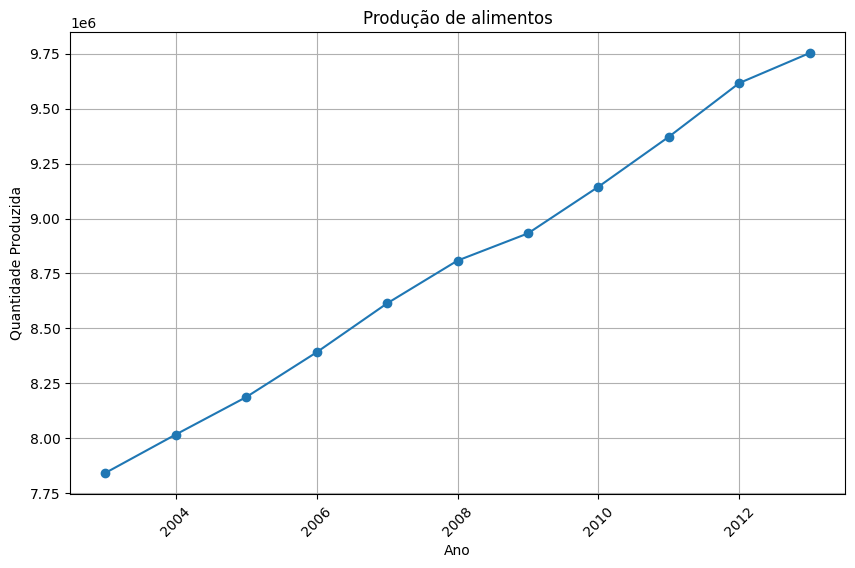

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(soma_food.index, soma_food.values, marker='o')
plt.title('Produção de alimentos')
plt.xlabel('Ano')
plt.ylabel('Quantidade Produzida')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

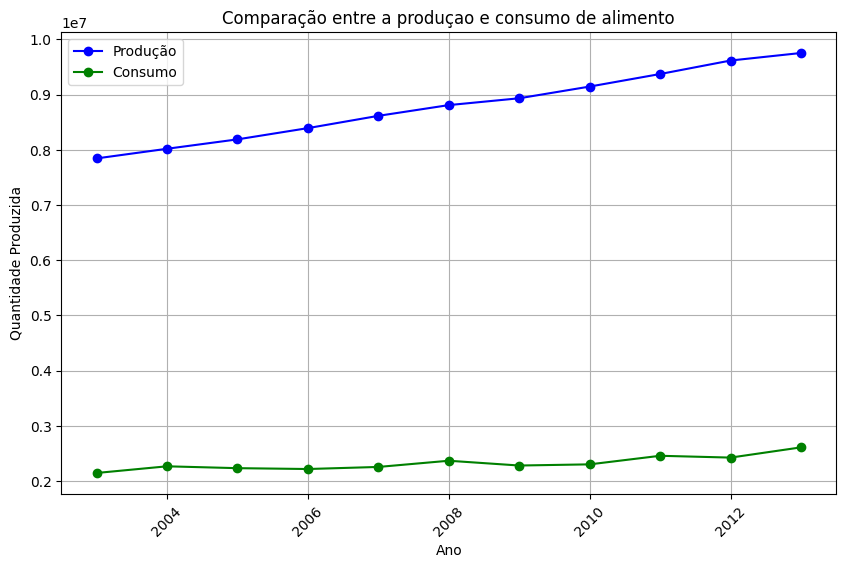

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(soma_food.index, soma_food.values, marker='o', label='Produção', color='blue')

plt.plot(soma_feed.index, soma_feed.values, marker='o', label='Consumo', color='green')

plt.title('Comparação entre a produçao e consumo de alimento')
plt.xlabel('Ano')
plt.ylabel('Quantidade Produzida')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.show()

['.config', 'Food Waste (FAO).xlsx', 'sample_data']


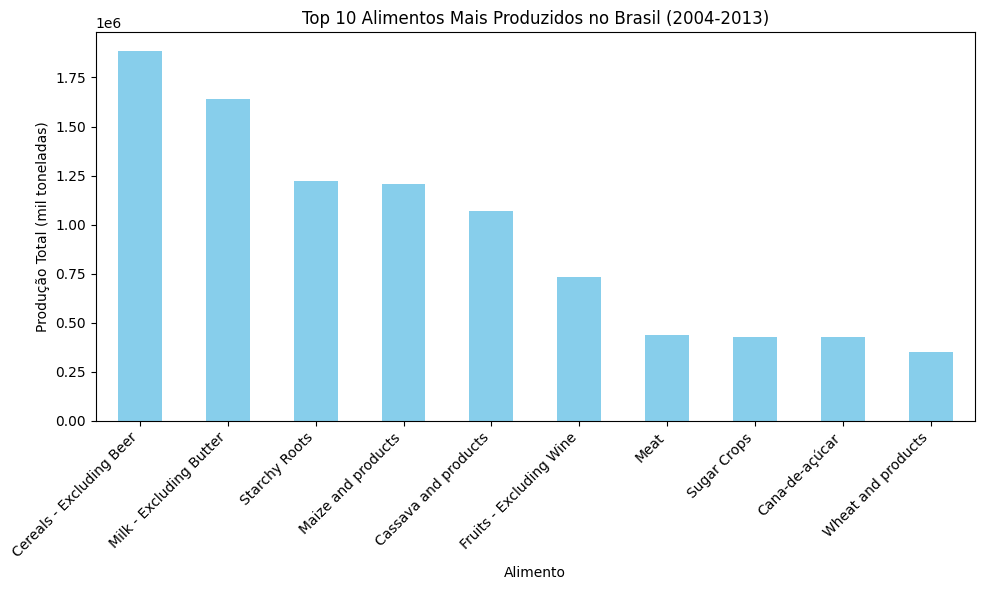

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

print(os.listdir())

file_path = 'Food Waste (FAO).xlsx'

try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em '{file_path}'")
    print("Verifique se o arquivo está no diretório correto e se o nome está escrito corretamente.")

brasil_data = data[data['Area'] == 'Brazil']

if 'Item' not in brasil_data.columns:
    if 'Item Code' in brasil_data.columns:
        brasil_data = brasil_data.rename(columns={'Item Code': 'Item'})
    else:
        raise KeyError("Coluna 'Item' ou equivalente não encontrada no DataFrame.")

translation_dict = {
    'Wheat': 'Trigo',
    'Rice': 'Arroz',
    'Corn': 'Milho',
    'Soybeans': 'Soja',
    'Barley': 'Cevada',
    'Sugar cane': 'Cana-de-açúcar',
    'Potatoes': 'Batatas',
    'Cassava': 'Mandioca',
    'Meat (beef)': 'Carne (vaca)',
    'Poultry': 'Aves',
}

brasil_data.loc[:, 'Item'] = brasil_data['Item'].map(translation_dict).fillna(brasil_data['Item'])

years_columns = brasil_data.select_dtypes(include=['number']).columns

brasil_grouped = brasil_data.groupby('Item')[years_columns].sum()

brasil_grouped['Total_Production'] = brasil_grouped.sum(axis=1)
top_produced = brasil_grouped['Total_Production'].sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_produced.plot(kind='bar', color='skyblue')
plt.title('Top 10 Alimentos Mais Produzidos no Brasil (2004-2013)')
plt.xlabel('Alimento')
plt.ylabel('Produção Total (mil toneladas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


['.config', 'Food Waste (FAO).xlsx', 'sample_data']
  Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   

                       Item  Element Code Element         Unit  latitude  \
0        Wheat and products          5142    Food  1000 tonnes      3394   
1  Rice (Milled Equivalent)          5142    Food  1000 tonnes      3394   
2       Barley and products          5521    Feed  1000 tonnes      3394   
3       Barley and products          5142    Food  1000 tonnes      3394   
4        Maize and products          5521    Feed  1000 tonnes      3394   

   longitude  ...    2004    2005    2006    2007    2008    2009    2010  \
0       6771  ...  3249.0  3486.0  3704.0  4164.0  4252.0  4538.0

<ipython-input-14-0e42a35d3986>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brasil_data['Item'] = brasil_data['Item'].map(translation_dict).fillna(brasil_data['Item'])


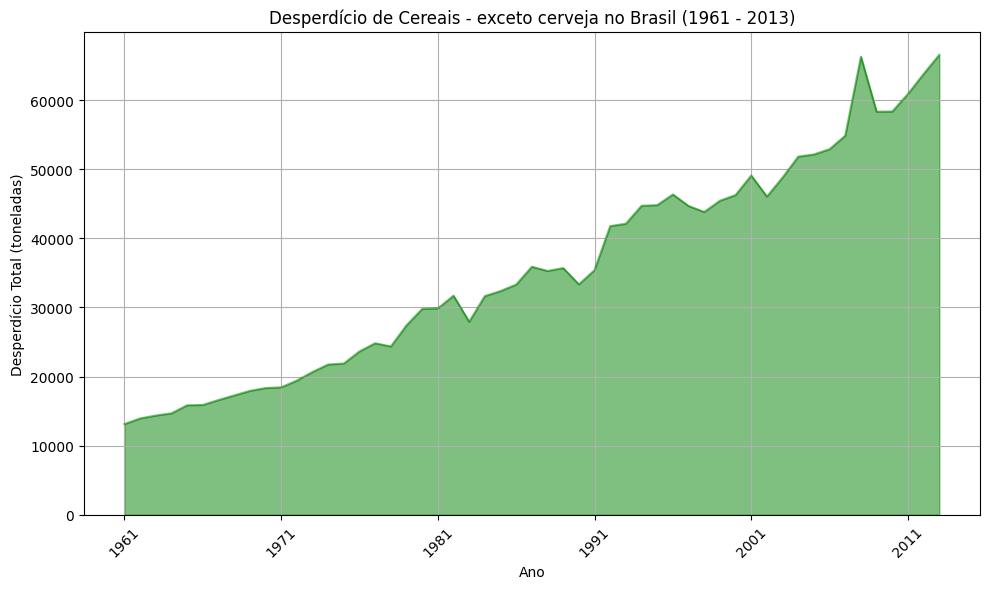

In [14]:
print(os.listdir())

file_path = 'Food Waste (FAO).xlsx'

try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em '{file_path}'")
    print("Verifique se o arquivo está no diretório correto e se o nome está escrito corretamente.")

print(data.head())

print("Colunas do DataFrame:", data.columns)

brasil_data = data[data['Area'] == 'Brazil']

if 'Item' not in brasil_data.columns:
    if 'Item Code' in brasil_data.columns:
        brasil_data = brasil_data.rename(columns={'Item Code': 'Item'})
    else:
        raise KeyError("Coluna 'Item' ou equivalente não encontrada no DataFrame.")

translation_dict = {
    'Cereals - Excluding Beer': 'Cereais - exceto cerveja',
}

brasil_data['Item'] = brasil_data['Item'].map(translation_dict).fillna(brasil_data['Item'])

cereals_data = brasil_data[brasil_data['Item'] == 'Cereais - exceto cerveja']

years_columns = [col for col in cereals_data.columns if isinstance(col, int)]

cereals_filtered = cereals_data[years_columns]

cereals_grouped = cereals_filtered.sum()

plt.figure(figsize=(10, 6))
cereals_grouped.plot(kind='area', color='green', alpha=0.5, figsize=(10, 6))
plt.title('Desperdício de Cereais - exceto cerveja no Brasil (1961 - 2013)')
plt.xlabel('Ano')
plt.ylabel('Desperdício Total (toneladas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

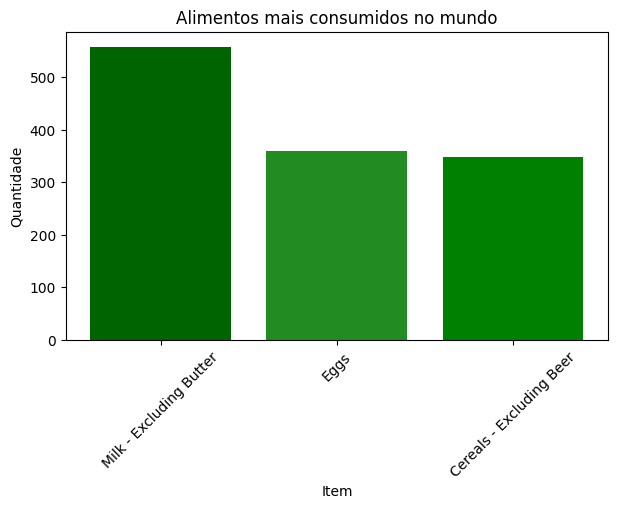

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_excel("Food Waste (FAO).xlsx")

dfQtde = df[["Area", "Item"]].groupby(by=["Item"]).count().reset_index()

dfQtde.rename(columns={"Area": "Quantidade"}, inplace=True)

dfQtde = dfQtde.sort_values(by="Quantidade", ascending=False)

n = 3
dfTopItens = dfQtde.head(n)

eixoX = dfTopItens["Item"]
eixoY = dfTopItens["Quantidade"]

plt.figure(figsize=(7, 4))
plt.title("Alimentos mais consumidos no mundo")
plt.xlabel("Item")
plt.ylabel("Quantidade")
plt.bar(eixoX, eixoY, color=["darkgreen", "forestgreen", "green", "seagreen", "mediumseagreen"])
plt.xticks(rotation=45)
plt.show()

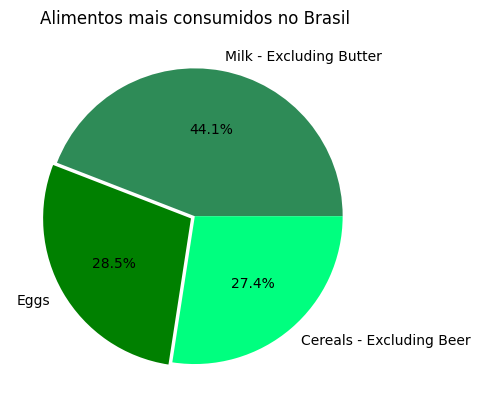

In [20]:
dfQtde = df[["Area", "Item"]].groupby(by=["Item"]).count().reset_index()

dfQtde.rename(columns={"Area": "Quantidade"}, inplace=True)

dfQtde = dfQtde.sort_values(by="Quantidade", ascending=False)

n = 3
dfTopItens = dfQtde.head(n)

plt.title("Alimentos mais consumidos no Brasil")
plt.pie(eixoY, explode=[0, 0.03, 0], colors=["seagreen", "green", "springgreen"], labels=eixoX, autopct="%1.1f%%")
plt.show()